Wstepene przygotowania do wykonania zadania

In [1]:
import pandas as pd
import os
import re
from functions import *


Tutaj pliki textowe są wczytywane do listy. Trzeba usunąć nowe linie oraz /xa0 (non-breaking space in Latin1)

In [2]:

articles_list = []
articles_name = []

path = "ustawy"
for file in os.listdir(path):
    # Check whether file is in text format or not
    file_path = f"{path}/{file}"
    temp = read_text_file(file_path).replace('\n',' ')
    articles_list.append(temp.replace('\xa0', ''))
    articles_name.append(file)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc4 in position 10: invalid continuation byte

Task 1

W 3 pierwszych komórkach sprawdzane są sufixy mogący występować z wyrażeniami

In [8]:

add_sufix = [re.findall('(?<=dodaje się )\w+', art) for art in articles_list]
add_sufix = sum(add_sufix, [])
#print(add_sufix)

add_sufix = list(dict.fromkeys(add_sufix))
print(add_sufix)



['wyrazy', 'pkt', 'ust', 'art', 'pkt4', 'lit', 'wyraz', 'załącznik', 'rozdział', 'zdanie', 'dział', 'tytuł', 'przecinek', 'oznaczenie', 'drugie', 'użyte', 'Rozdział', 'pkt2a', 'nowy', 'pkt9a', 'przecineki', 'pkt1a', 'wyrazySrad', 'określenie', 'pkt10', 'na', 'rozdziały', 'średnik', 'pkt28', 'pkt8', 'dwukrotnie', 'trzykrotnie', 'w', 'poz', 'usta', 'pkt20', 'nowe', '2a', 'pkt133', 'kropkę', 'oddział', 'kwotę', 'cyfrę', 'zdania', '38a', 'po', 'pkt5a', 'odnośnik', 'lp', 'tiret', 'pozycję', 'pozycjęw', 'pkt13a', 'pkt17', 'pkt6', 'litery', 'trzecie', 'zadanie', 'ozna', 'użyty', 'dwukropek', 'Oddział', 'wraz']


In [14]:
remove_sufix = [re.findall('(?<=skreśla się )\w+', art) for art in articles_list]
remove_sufix = sum(remove_sufix, [])
#print(add_sufix)

remove_sufix = list(dict.fromkeys(remove_sufix))
print(remove_sufix)

remove_sufix = [re.findall('(?<=uchyla się )\w+', art) for art in articles_list]
remove_sufix = sum(remove_sufix, [])
#print(add_sufix)


remove_sufix = list(dict.fromkeys(remove_sufix))
print(remove_sufix)

['ust', 'kropkę', 'zdanie', 'art', 'wyrazy', 'pkt', 'wyraz', 'oznaczenie', 'przecinek', 'rozdział', 'lit', 'użyty', 'zdaniedrugie', 'i', 'dział', 'użyte', 'z', 'tytuł', 'oddział', 'na', '1', 'pkt7', 'powołanie', 'Dział', 'oraz', 'preambułę', 'pozostałą', 'poz', 'rozdziały', 'w', 'załącznik', 'zdanietrzecie', 'ostatnie', 'drugie', 'zewidencji', 'przyimek']
['ust', 'zdanie', 'pkt', 'pkt4r', 'art', 'rozdział', 'lit', 'od', 'decyzję', 'pkt18', 'pkt33', 'pkt39', 'pkt7', 'z', 'pkt1', 'pkt6', 'pkt51', 'w', 'dział', 'pkt2', 'odspełnienia', 'odzłożenia', 'tytułVIII', 'tiret', 'decyzje', 'ustawę', 'pkt4', 'pkt10', 'pkt20', 'odnośnik', 'pkt5', 'poz', 'niezwłocznie', 'lub', 'zdanietrzecie']


In [20]:
change_sufix = [re.findall('(\S+)\s*(\S+)\s*(?=\s+otrzymuje brzmienie)', art) for art in articles_list[:5]]
change_sufix = sum(change_sufix, [])
#print(add_sufix)

change_sufix = list(dict.fromkeys(change_sufix))
print(change_sufix)


[('pkt', '2'), ('art.', '21'), ('pkt', '5'), ('pkt', '8'), ('pkt', '11'), ('ust.', '3'), ('ust.', '4'), ('art.', '5'), ('ust.', '5'), ('ust.', '1'), ('art.', '10'), ('art.', '13'), ('art.', '14'), ('art.', '15'), ('art.', '16'), ('art.', '17'), ('art.', '19'), ('pkt', '4'), ('ust.', '2'), ('ust.', '8'), ('pkt', '3')]


W poniższej komórce wpisywane jest liczba wystąpień każdej z operacji dla każdego pliku

In [185]:
article_addition = []
article_removal = []
article_change = []
for art in articles_list:
    article_addition.append(len(re.findall(r"\bdodaje\s*się\s*(ust|pkt\w+|art|rozdział|lit|dział|poz)\b", art, re.IGNORECASE))) #tu whitespace tu w słowniku tylko
    article_removal.append(len(re.findall(r"\b(skreśla|uchyla)\s*się\s*(ust|pkt\w+|art|rozdział|lit|dział|poz)\b", art, re.IGNORECASE)))        #uchyla się
    article_change.append(len(re.findall(r"\botrzymuje brzmienie\b", art, re.IGNORECASE)))


Task3

W poniższej komórce są wypisywane daty z których pochodzi dana ustawa. Zachowana jest kolejność. Niektóre pliki mają zawartość "Brak tekstu w postaci elektronicznej " wtedy zapisuje je jako "brak danych"

In [191]:
article_year = []
i = 0
for art in articles_list:
    if art == "Brak tekstu w postaci elektronicznej ":
        article_year.append("brak danych")
    else:
        temp = (re.search(r"((USTAWA|U S T A W A|\S*Ustawa|USTAWA\s*\w+\s* NA ROK \d\d\d\d|USTAWA\s*\w+\s*)\s*z\s*dnia)(\s*\d+\s*\w+\s*)(\d\d\d\d)(?=\s*r.)", art, re.IGNORECASE))
        article_year.append(temp.group(4)) #tu whitespace tu w słowniku tylko

    i+=1

Tutaj tworzony jest dataframe z zawierający liczbę dodań, usunięć oraz zmian wraz z rokiem pochodzenia ustawy. Następnie jest robiony groupby aby zsumować wartości wzgledem roku oraz wartości zmienione są na procenty. Na końcu rysowany jest graf

In [192]:
amendments_df = pd.DataFrame(list(zip(article_year, article_addition, article_removal, article_change)), columns=['year','add', 'remove', 'change'])

In [194]:
amendments_sum_df = amendments_df.groupby('year').sum()
amendments_sum_df

,add,remove,change
year,,,
1993,26,6,64
1994,67,31,77
1995,201,60,349
1996,214,110,500
1997,331,133,690
1998,402,176,919
1999,156,46,247
2000,715,234,1443
2001,929,231,1453


In [196]:
amendments_perc_df = (amendments_sum_df.T / amendments_sum_df.T.sum()).Tdf.plot.bar(rot=0)
amendments_perc_df

,add,remove,change
year,,,
1993,0.270833,0.062500,0.666667
1994,0.382857,0.177143,0.440000
1995,0.329508,0.098361,0.572131
1996,0.259709,0.133495,0.606796
1997,0.286828,0.115251,0.597920
1998,0.268537,0.117568,0.613894
1999,0.347439,0.102450,0.550111
2000,0.298913,0.097826,0.603261
2001,0.355530,0.088404,0.556066


<AxesSubplot: xlabel='year'>

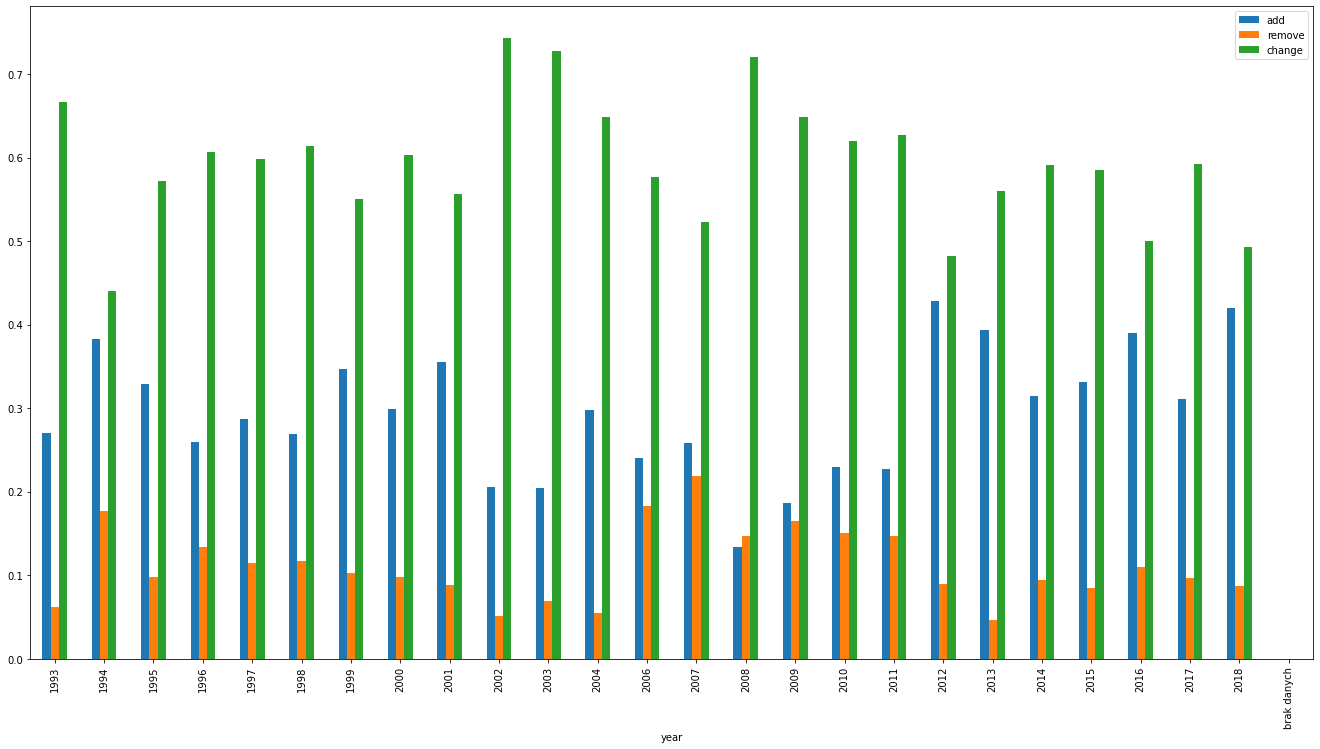

In [264]:
amendments_perc_df.plot.bar(figsize=(23,12))

Task 4

Formuła zawiera to czego szukamy, czyli wszystkie formy fleksyjne. \W+ jest aby nie wyłapywać słów połączonych. Tak samo w task 5, task 6 oraz task 7

In [253]:
formula = r"(ustawa|ustawy|ustaw|ustawie|ustawom|ustawę|ustawą|ustawami|ustawie|ustawach|ustawo|ustawy)\W+"

ustawa_count = 0
for art in articles_list:
    ustawa_count+=len(re.findall(formula, art, re.IGNORECASE)) #tu whitespace tu w słowniku tylko
print(ustawa_count)

24114


task 5

In [256]:
formula = r"(ustawa|ustawy|ustaw|ustawie|ustawom|ustawę|ustawą|ustawami|ustawie|ustawach|ustawo|ustawy)\W+(?=(\s*z\s*dnia))"

ustawa_zdnia_count = 0
for art in articles_list:
    ustawa_zdnia_count+=len(re.findall(formula, art, re.IGNORECASE)) #tu whitespace tu w słowniku tylko
print(ustawa_zdnia_count)

8286


task 6

In [257]:
formula = r"(ustawa|ustawy|ustaw|ustawie|ustawom|ustawę|ustawą|ustawami|ustawie|ustawach|ustawo|ustawy)\W+(?!(\s*z\s*dnia))"

ustawa_niezdnia_count = 0
for art in articles_list:
    ustawa_niezdnia_count+=len(re.findall(formula, art, re.IGNORECASE)) #tu whitespace tu w słowniku tylko
print(ustawa_niezdnia_count)

15828


(result 4 =? result 5 + result 6)?

In [259]:
ustawa_zdnia_count + ustawa_niezdnia_count == ustawa_count

True

task 7

In [260]:
formula = r"(ustawa|ustawy|ustaw|ustawie|ustawom|ustawę|ustawą|ustawami|ustawie|ustawach|ustawo|ustawy)\W+(?!(\s*o\s*zmianie))"

ustawa_nieozmianie_count = 0
for art in articles_list:
    ustawa_nieozmianie_count+=len(re.findall(formula, art, re.IGNORECASE)) #tu whitespace tu w słowniku tylko
print(ustawa_nieozmianie_count)

24083


task 8

Z wyników poprzednich zadań tworzony jest dataframe a następnie rysowany graf

<AxesSubplot: xlabel='lab'>

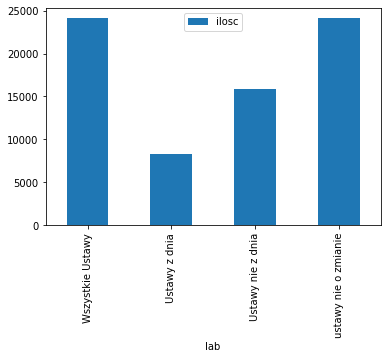

In [263]:
df_bar = pd.DataFrame({'lab':['Wszystkie Ustawy', 'Ustawy z dnia', 'Ustawy nie z dnia', "ustawy nie o zmianie"], 'ilosc':[ustawa_count, ustawa_zdnia_count, ustawa_niezdnia_count, ustawa_nieozmianie_count]})
df_bar.plot.bar(x='lab', y='ilosc')